### Global Classifier from Yuanfang

The global classifier from the Yuanfang Paper on the challenge has proven so much more successful than my current model, that I start to believe that the specific monotherapy data are simply better predictors than my chemical features. This would also be a finding<br>
Theory for later: Maybe RFs are not the ideal model to model those curves. What would be more helpful is something that models the sigmoid curves (which is supplied in "Quality data" in dream challenge but not present here)

In [32]:
# @Ammar: How do I deal with outliers like that:
data[data["BlockID"]==2]

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
25,2,1,1,5-FU,ABT-888,0.00,0.00,100.000626,uM,uM,ONEIL,A2058
26,2,1,2,5-FU,ABT-888,0.00,0.35,101.993009,uM,uM,ONEIL,A2058
27,2,1,3,5-FU,ABT-888,0.00,1.08,100.957673,uM,uM,ONEIL,A2058
28,2,1,4,5-FU,ABT-888,0.00,3.25,99.930372,uM,uM,ONEIL,A2058
29,2,1,5,5-FU,ABT-888,0.00,10.00,98.861202,uM,uM,ONEIL,A2058
30,2,2,1,5-FU,ABT-888,0.35,0.00,101.753521,uM,uM,ONEIL,A2058
31,2,2,2,5-FU,ABT-888,0.35,0.35,109.013513,uM,uM,ONEIL,A2058
32,2,2,3,5-FU,ABT-888,0.35,1.08,17.988610,uM,uM,ONEIL,A2058
33,2,2,4,5-FU,ABT-888,0.35,3.25,87.839016,uM,uM,ONEIL,A2058
34,2,2,5,5-FU,ABT-888,0.35,10.00,78.350218,uM,uM,ONEIL,A2058


In [1]:
import numpy as np
import pandas as pd
import _pickle as pkl

In [4]:
df1 = pd.read_csv("../drugCombDBdata/drugcombs_response.csv")
print(df1.shape)

(6103237, 11)


In [5]:
data = df1[df1["source"]=="ONEIL"]
del df1
print(data.shape)
data.head(2)

(2305200, 11)


,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source
0,1,1,1,5-FU,ABT-888,0.0,0.00,100.000626,uM,uM,ONEIL
1,1,1,2,5-FU,ABT-888,0.0,0.35,101.993009,uM,uM,ONEIL


In [6]:
#enriching df2 with cell line info
df2 = pd.read_csv("../drugCombDBdata/synergy-score-data/REGRdrugcombs_scored.csv")
cellBlockDf = df2.loc[:,["ID","Cell line"]]
data = data.join(cellBlockDf.set_index("ID"),on="BlockID")
print(data.shape)
data.head(2)

(2305200, 12)


,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
0,1,1,1,5-FU,ABT-888,0.0,0.00,100.000626,uM,uM,ONEIL,A2058
1,1,1,2,5-FU,ABT-888,0.0,0.35,101.993009,uM,uM,ONEIL,A2058


Actually we want to enrich df2, with data from "data"<br>

In [33]:
df2.head()

,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA
0,1,5-FU,ABT-888,A2058,1.72,6.26,-2.75,5.54
1,2,5-FU,ABT-888,A2058,5.88,12.33,3.33,11.61
2,3,5-FU,ABT-888,A2058,3.59,11.66,2.65,10.94
3,4,5-FU,ABT-888,A2058,-0.85,5.15,-3.86,4.43
4,5,5-FU,AZD1775,A2058,12.29,15.77,10.40,18.66


The ID column is exactly the same as the index, but +1. It is equivalent to the BlockID in "data"

In [45]:
monotherapy = data[ (data["ConcRow"]==0) | (data["ConcCol"]==0)]
del data

In [48]:
monotherapy.head(12)

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
0,1,1,1,5-FU,ABT-888,0.00,0.00,100.000626,uM,uM,ONEIL,A2058
1,1,1,2,5-FU,ABT-888,0.00,0.35,101.993009,uM,uM,ONEIL,A2058
2,1,1,3,5-FU,ABT-888,0.00,1.08,100.957673,uM,uM,ONEIL,A2058
3,1,1,4,5-FU,ABT-888,0.00,3.25,99.930372,uM,uM,ONEIL,A2058
4,1,1,5,5-FU,ABT-888,0.00,10.00,98.861202,uM,uM,ONEIL,A2058
5,1,2,1,5-FU,ABT-888,0.35,0.00,101.753521,uM,uM,ONEIL,A2058
10,1,3,1,5-FU,ABT-888,1.08,0.00,97.589743,uM,uM,ONEIL,A2058
15,1,4,1,5-FU,ABT-888,3.25,0.00,84.949945,uM,uM,ONEIL,A2058
20,1,5,1,5-FU,ABT-888,10.00,0.00,60.293230,uM,uM,ONEIL,A2058
25,2,1,1,5-FU,ABT-888,0.00,0.00,100.000626,uM,uM,ONEIL,A2058


In [52]:
monotherapy1 = monotherapy[monotherapy["BlockID"]==1]
min(monotherapy1[(monotherapy1["Row"]==2)|(monotherapy1["Col"]==2)]['Response'])

101.75352135667578

In [53]:
abc = [1,3,6,7]
abc[-2]

6

In [63]:
#copy this 3 times after having normalised data
max1ab = []
min1ab = []
sum1ab = []
max2ab = []
min2ab = []
sum2ab = []
max3ab = []
min3ab = []
sum3ab = []
max4ab = []
min4ab = []
sum4ab = []
for i in range(5):
    monoT = monotherapy[monotherapy["BlockID"]==i+1]
    monoT[(monoT["Row"]==2)|(monoT["Col"]==2)]

    max1ab.append(max(monoT[(monoT["Row"]==2)|(monoT["Col"]==2)]['Response']))
    max2ab.append(max(monoT[(monoT["Row"]==3)|(monoT["Col"]==3)]['Response']))
    max3ab.append(max(monoT[(monoT["Row"]==4)|(monoT["Col"]==4)]['Response']))
    max4ab.append(max(monoT[(monoT["Row"]==5)|(monoT["Col"]==5)]['Response']))
    min1ab.append(min(monoT[(monoT["Row"]==2)|(monoT["Col"]==2)]['Response']))
    min2ab.append(min(monoT[(monoT["Row"]==3)|(monoT["Col"]==3)]['Response']))
    min3ab.append(min(monoT[(monoT["Row"]==4)|(monoT["Col"]==4)]['Response']))
    min4ab.append(min(monoT[(monoT["Row"]==5)|(monoT["Col"]==5)]['Response']))
    sum1ab.append(sum([max1ab[-1],min1ab[-1]]))
    sum2ab.append(sum([max2ab[-1],min2ab[-1]]))
    sum3ab.append(sum([max3ab[-1],min3ab[-1]]))
    sum4ab.append(sum([max4ab[-1],min4ab[-1]]))

In [65]:
sum1ab

[203.7465308250599,
 203.7465308250599,
 203.7465308250599,
 203.7465308250599,
 200.95262522505988]

In [38]:
for index, row in df2.head().iterrows():
    print(index)
    print(row)

0
ID                 1
Drug1           5-FU
Drug2        ABT-888
Cell line      A2058
ZIP             1.72
Bliss           6.26
Loewe          -2.75
HSA             5.54
Name: 0, dtype: object
1
ID                 2
Drug1           5-FU
Drug2        ABT-888
Cell line      A2058
ZIP             5.88
Bliss          12.33
Loewe           3.33
HSA            11.61
Name: 1, dtype: object
2
ID                 3
Drug1           5-FU
Drug2        ABT-888
Cell line      A2058
ZIP             3.59
Bliss          11.66
Loewe           2.65
HSA            10.94
Name: 2, dtype: object
3
ID                 4
Drug1           5-FU
Drug2        ABT-888
Cell line      A2058
ZIP            -0.85
Bliss           5.15
Loewe          -3.86
HSA             4.43
Name: 3, dtype: object
4
ID                 5
Drug1           5-FU
Drug2        AZD1775
Cell line      A2058
ZIP            12.29
Bliss          15.77
Loewe           10.4
HSA            18.66
Name: 4, dtype: object


In [29]:
vals = []
for el in range(5):
    vals.append(min(data[data["BlockID"]==el+1].loc[:,"Response"]))
print(vals)

[49.6118750690819, 17.9886101567636, 40.9733801742521, 56.1244060986788, 7.555056163789303]


In [36]:
data[data["BlockID"]==5]

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
100,5,1,1,5-FU,AZD1775,0.00,0.0000,100.000626,uM,uM,ONEIL,A2058
101,5,1,2,5-FU,AZD1775,0.00,0.0325,99.199104,uM,uM,ONEIL,A2058
102,5,1,3,5-FU,AZD1775,0.00,0.0800,95.913912,uM,uM,ONEIL,A2058
103,5,1,4,5-FU,AZD1775,0.00,0.2000,68.469005,uM,uM,ONEIL,A2058
104,5,1,5,5-FU,AZD1775,0.00,0.5000,17.538291,uM,uM,ONEIL,A2058
105,5,2,1,5-FU,AZD1775,0.35,0.0000,101.753521,uM,uM,ONEIL,A2058
106,5,2,2,5-FU,AZD1775,0.35,0.0325,89.286513,uM,uM,ONEIL,A2058
107,5,2,3,5-FU,AZD1775,0.35,0.0800,88.860610,uM,uM,ONEIL,A2058
108,5,2,4,5-FU,AZD1775,0.35,0.2000,29.899016,uM,uM,ONEIL,A2058
109,5,2,5,5-FU,AZD1775,0.35,0.5000,10.564218,uM,uM,ONEIL,A2058


/home/stefanhuber3125/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/stefanhuber3125/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


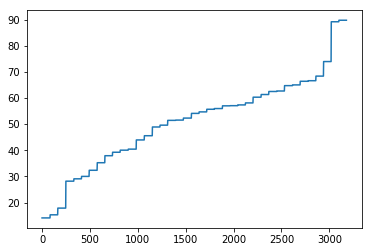

In [60]:
resp5FUconc10 = np.array(data[data["DrugRow"]=="5-FU"][data["ConcCol"]==0][data["ConcRow"]==10]["Response"])
resp5FUconc10.sort()
from matplotlib import pyplot as plt
plt.plot(resp5FUconc10)

In [31]:
np.array(data["DrugRow"]=="Doxorubicin") & np.array(data["ConcCol"]==0)

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
# map blockID with cell type

In [7]:
df2 = pd.read_csv("../drugCombDBdata/synergy-score-data/REGRdrugcombs_scored.csv")

In [8]:
cellBlockDf = df2.loc[:,["ID","Cell line"]]

In [9]:
df = df1.join(cellBlockDf.set_index("ID"),on="BlockID")
df.head()

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
0,1,1,1,5-FU,ABT-888,0.0,0.00,100.000626,uM,uM,ONEIL,A2058
1,1,1,2,5-FU,ABT-888,0.0,0.35,101.993009,uM,uM,ONEIL,A2058
2,1,1,3,5-FU,ABT-888,0.0,1.08,100.957673,uM,uM,ONEIL,A2058
3,1,1,4,5-FU,ABT-888,0.0,3.25,99.930372,uM,uM,ONEIL,A2058
4,1,1,5,5-FU,ABT-888,0.0,10.00,98.861202,uM,uM,ONEIL,A2058


In [10]:
# set values above 100 to exactly 100. Those are fluctuations in the experimental data
for i in range(len(df)):
    if df["Response"][i]>100:
        df["Response"][i] = 100

<ipython-input-10-a5851e1da90f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Response"][i] = 100


In [122]:
dfGrouped = df.groupby("BlockID").first()

In [123]:
dfForSecondScoring = dfGrouped["source"]

In [131]:
dfGrouped[]

,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
BlockID,,,,,,,,,,,
1,1,1,5-FU,ABT-888,0.0,0.0,100.0,uM,uM,ONEIL,A2058
2,1,1,5-FU,ABT-888,0.0,0.0,100.0,uM,uM,ONEIL,A2058
3,1,1,5-FU,ABT-888,0.0,0.0,100.0,uM,uM,ONEIL,A2058
4,1,1,5-FU,ABT-888,0.0,0.0,100.0,uM,uM,ONEIL,A2058
5,1,1,5-FU,AZD1775,0.0,0.0,100.0,uM,uM,ONEIL,A2058
...,...,...,...,...,...,...,...,...,...,...,...
91028,1,1,TEMOZOLOMIDE,MK-4827,0.0,0.0,100.0,uM,uM,ONEIL,A2058
91029,1,1,TEMOZOLOMIDE,MK-8776,0.0,0.0,100.0,uM,uM,ONEIL,A2058
91030,1,1,TEMOZOLOMIDE,MK-8776,0.0,0.0,100.0,uM,uM,ONEIL,A2058


In [38]:
np.flip(arr,axis=1)

array([[[ 0,  1, -1, -2],
        [ 8,  7,  6,  5],
        [ 2,  3,  4,  5]],

       [[ 0,  6,  3,  9],
        [ 9,  8,  4,  3],
        [ 1,  3,  5,  7]]])

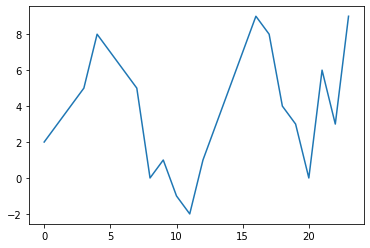

In [16]:
from matplotlib import pyplot as plt
import numpy as np
arr = np.array([[[2,3,4,5],[8,7,6,5],[0,1,-1,-2]],[[1,3,5,7],[9,8,4,3],[0,6,3,9]]])
plt.plot(arr.flatten())

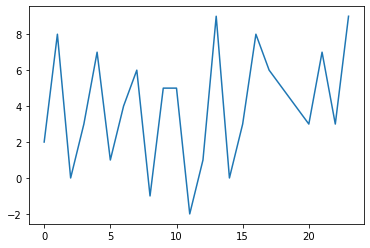

In [33]:
arr2 = []
for num,sub in enumerate(arr):
    arr2.append(sub.transpose())
    #sub = sub.transpose()
plt.plot(np.array(arr2).flatten())